## Assignment 1 Intelligent Data Analysis DV1597
### Adnan Altukleh, Abdulkarim Dawalibi 
###### adnantakleh12@gamil.com
###### karimdawalibi@gmail.com

### Q1. Explain the data cleaning steps you consider for analyzing the provided dataset. You must motivate and describe why, how, and in which order you are going to apply the selected steps to the dataset.

* First of all, we will start by printing out the first and last five values in the dataset and try to understand what does each column in the data represent, what type of data it contains and the importance of it. This gives us a view of the data and make easier for us in the furthur steps.  
* Check how many rows there are in the dataset, in this way we get to know how big the dataset is.
* Check if there is any missing values, in case of founding missing values we will evalute the importance of it and decide what is the best solution to deal with it. 
* Check if there are any duplicated records in the dataset. In case of founding duplicates we will remove them to avoid them from affecting the analysis result.
* Check the uniform of the data, e.g if there is any values with many decimal.
* Check if there are outliers in the dataset. In case of founding outliers will we remove them to improve the analysis result.

In [631]:
%matplotlib inline

In [632]:
import matplotlib.pyplot as mpl
import numpy as np
import pandas as pd
import scipy.stats as scp
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
import scipy.stats as st

#### Reading the Dataset:

In [633]:
data_set=pd.read_csv("SMHI_Data.csv",sep=",")
data_set

,Datum,Tid (UTC),Lufttemperatur,Kvalitet
0,2010-03-01,00:00:00,2.0,G
1,2010-03-01,01:00:00,NaN,Y
2,2010-03-01,02:00:00,2.2,Y
3,2010-03-01,03:00:00,1.7,G
4,2010-03-01,04:00:00,1.7,Y
...,...,...,...,...
105111,2022-01-01,03:00:00,5.1,G
105112,2022-01-01,04:00:00,4.2,G
105113,2022-01-01,05:00:00,4.1,G
105114,2022-01-01,05:00:00,4.1,G


NOTE! Our dataset contain 105116 rows and 4 columns.

#### Check if Duplicates exists in this case 'Datum' and 'Tid(UTC)':

In [634]:
data_set[data_set.duplicated(["Datum",'Tid (UTC)'])]

,Datum,Tid (UTC),Lufttemperatur,Kvalitet
170,2010-03-08,03:00:00,-4.4,G
228,2010-03-10,13:00:00,-2.2,Y
367,2010-03-16,07:00:00,-4.1,Y
392,2010-03-17,07:00:00,1.3,Y
414,2010-03-18,04:00:00,-0.7,Y
...,...,...,...,...
104910,2021-12-23,21:00:00,0.0,G
104989,2021-12-27,03:00:00,-6.0,G
105091,2021-12-31,08:00:00,6.2,G
105111,2022-01-01,03:00:00,5.1,G


Removing the duplicated rows from the dataset

In [635]:
data_set=data_set.drop_duplicates(subset=["Datum",'Tid (UTC)'])

#### Round all values in 'Lufttemperatur' to 1 decimal 

In [636]:
data_set=data_set.round({"Lufttemperatur":1})

### Q2. Does the dataset contain any missing values? If so, how many in both absolute terms and percentages? Reflect on the number of missing values. Do you regard it as much, or not?

Check the existence of missing values

In [637]:
data_set.isnull().values.any()

True

Check how many and where is the missing values

In [638]:
null =data_set["Lufttemperatur"].isnull().sum()
null

6191

calculating the percentage of the missing values of the dataset 

In [639]:
percentage = round((null/data_set.shape[0])*100,1)
print(f'%{percentage}')

%6.0


We recognize that only the 'Lufttemperatur' column that have missing values, and the sum of missing value is 6191 which is 6% of the total rows in the dataset. In this case the rows are meaningless and they will not impact the final result, if we remove them. The number of rows that missing a value is big but if we compare it with the total number of all rows so we recognize that the rows which has a missing value is not big.

### Q3. Which strategy was used for handling the missing values? Motivate why you consider the selected strategy the most suitable for this task.

If we look at the first five values we can notice that they do not differ much but the last five have a big difference between.
Therefore we can not filling the missing value with previous value, instead we remove them from the dataset, so that the dataset becomes more understandable and as we mentioned above the missing values rows won't make a huge affect of the result if we remove them.

We drop the rows that missing value using the command below

In [640]:
data_set=data_set.dropna()

Now we check if we succeeded removing the missing values

In [641]:
data_set.isnull().values.any()

False

In [642]:
data_set.shape

(96986, 4)

Using the box plot to check if any outliers exists:

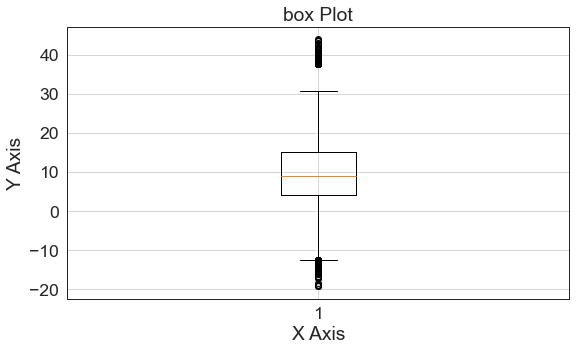

In [643]:
x=data_set["Lufttemperatur"]
fig = mpl.figure(figsize=(9,5))
ax=fig.add_subplot()
ax.boxplot(x)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_title("box Plot")
ax.grid()

Chnage the value of the founded outliers to NaN to be removed in the next steps

In [644]:
for x in ["Lufttemperatur"]:
    q75,q25 = np.percentile(data_set.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data_set.loc[data_set[x] < min,x] = np.nan
    data_set.loc[data_set[x] > max,x] = np.nan

In [645]:
data_set=data_set.dropna()

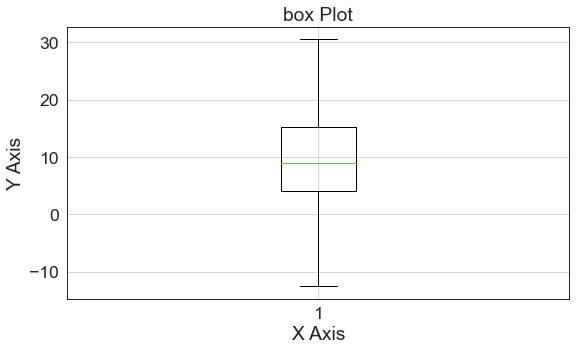

In [646]:
x=data_set["Lufttemperatur"]
fig = mpl.figure(figsize=(9,5))
ax=fig.add_subplot()
ax.boxplot(x)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_title("box Plot")
ax.grid()

### Q4. Calculate the following statistics for the air temperature values in the dataset:
* minimum value
* maximum value
* sample mean
* Q1/Q2/Q3 quartiles
* sample standard deviation
* 95% confidence interval of the mean

* ##### printing minimum value in the data set för air temperature

In [647]:
x=data_set["Lufttemperatur"].min()

In [648]:
x

-12.5

printing when the minimum value exist

In [649]:
data_set.loc[data_set['Lufttemperatur'] == x]

,Datum,Tid (UTC),Lufttemperatur,Kvalitet
17014,2012-02-04,06:00:00,-12.5,G


* ##### printing Maximum value in the data set for air temperature

In [650]:
y=data_set["Lufttemperatur"].max()

In [651]:
y

30.6

printing when the Maximum value exist

In [652]:
data_set.loc[data_set['Lufttemperatur'] == y]

,Datum,Tid (UTC),Lufttemperatur,Kvalitet
3153,2010-07-12,12:00:00,30.6,G


* ##### printing sample mean of  air temperature

In [653]:
m=data_set['Lufttemperatur'].mean()

In [654]:
m

9.386289373128387

* ##### printing Q1/Q2/Q3 quartiles

In [655]:
data_set["Lufttemperatur"].quantile([.25, .5, .75])

0.25     4.1
0.50     9.0
0.75    15.2
Name: Lufttemperatur, dtype: float64

* ##### sample standard deviation

In [656]:
s=data_set['Lufttemperatur'].std()

In [657]:
s

6.955889553853636

* ##### 95% confidence interval of the mean

the formula is 
* Lower Value  $\overline{x}$ - z$\frac{s}{\sqrt{n}}$
* Upper Value  $\overline{x}$ + z$\frac{s}{\sqrt{n}}$

* X (mean) = m (9.386289373128387)
* Z = 1.960 (from the table above for 95%)
* s (standard deviation) = s (6.955889553853636)
* n (sample size) = 96830 (after cleaning)

calucleting z$\frac{s}{\sqrt{n}}$

In [658]:
a=1.96*(s/pow(96830,(1/2)))

* getting lower and upper values

In [659]:
"Lower Value", m-a

('Lower Value', 9.342476293280633)

In [660]:
"Upper Value",m+a

('Upper Value', 9.43010245297614)

### Q5. Plot all available air temperature data as a line plot with dates on the x-axis.


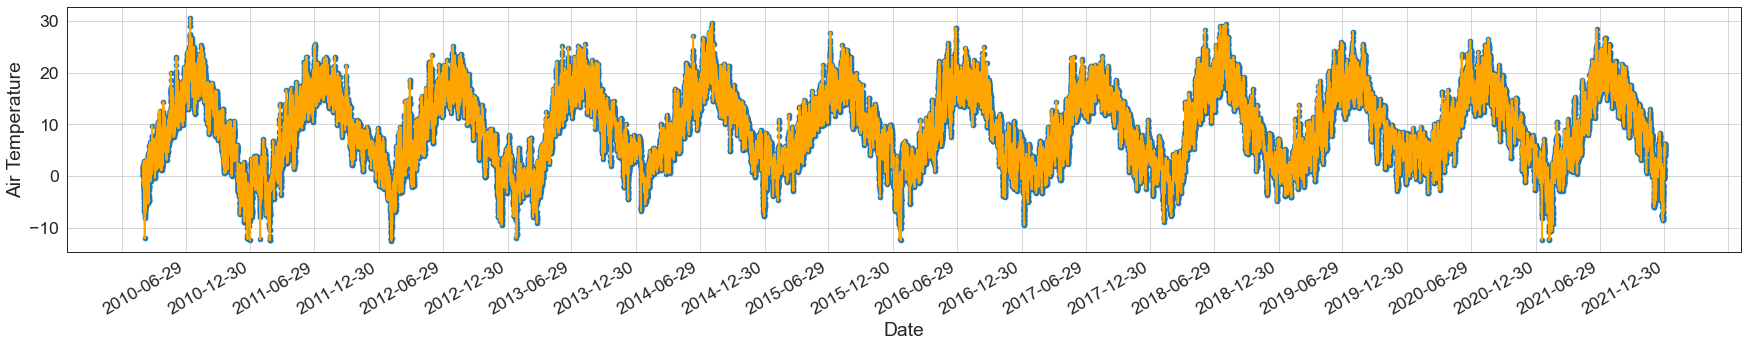

In [661]:
x= data_set.Datum
y= data_set.Lufttemperatur

# Plotting
fig = mpl.figure(figsize=(30,5))
ax=fig.add_subplot()
ax.plot(x,y,color="orange",linewidth=2)
half_year_locator = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(half_year_locator)
fig.autofmt_xdate()
ax.set_xlabel('Date')
ax.set_ylabel('Air Temperature')
ax.scatter(x,y)
ax.grid()

### Q6. Rank the overall temperature per month, sort from the coldest to the warmest. List the top ten (10) coldest months in the dataset. Format the output as: YEAR/Month: temp, e.g.“2010/January: -5.0”

Groupby data Date (month,year) and Temperature

In [662]:
da=data_set.Datum.str[:-3]
a=round(data_set.groupby(da)['Lufttemperatur'].mean(),1)
dt=pd.DataFrame(a)
dt

,Lufttemperatur
Datum,
2010-03,0.5
2010-04,6.0
2010-05,9.7
2010-06,14.8
2010-07,19.4
...,...
2021-09,14.7
2021-10,10.9
2021-11,6.6


Sorting from the coldest to the warmest

In [663]:
dt.sort_values("Lufttemperatur")

,Lufttemperatur
Datum,
2010-12,-3.5
2011-02,-1.3
2012-02,-1.1
2018-02,-1.0
2021-02,-0.9
...,...
2010-07,19.4
2018-08,19.6
2014-07,20.4


List the top 10 coldest months in the dataset

In [664]:
list_top=dt.nsmallest(n=10, columns=['Lufttemperatur'])

In [665]:
l=list_top.reset_index()

In [666]:
l.round({"Lufttemperatur":1})

,Datum,Lufttemperatur
0,2010-12,-3.5
1,2011-02,-1.3
2,2012-02,-1.1
3,2018-02,-1.0
4,2016-01,-0.9
5,2021-02,-0.9
6,2013-03,-0.8
7,2013-01,-0.6
8,2011-01,-0.5
9,2012-12,-0.5


In [667]:
f=pd.to_datetime(l["Datum"], format='%Y-%m')
f=f.dt.strftime("%Y/%B")
f

0    2010/December
1    2011/February
2    2012/February
3    2018/February
4     2016/January
5    2021/February
6       2013/March
7     2013/January
8     2011/January
9    2012/December
Name: Datum, dtype: object

In [668]:
f=pd.DataFrame(f)
f

,Datum
0,2010/December
1,2011/February
2,2012/February
3,2018/February
4,2016/January
5,2021/February
6,2013/March
7,2013/January
8,2011/January
9,2012/December


In [669]:
l=l.drop(columns=['Datum'])
l.round({"Lufttemperatur":1})

,Lufttemperatur
0,-3.5
1,-1.3
2,-1.1
3,-1.0
4,-0.9
5,-0.9
6,-0.8
7,-0.6
8,-0.5
9,-0.5


In [670]:
x=pd.concat([f, l], axis=1, join='inner')

In [671]:
for i in range(10):
    print(x["Datum"][i],":",x["Lufttemperatur"][i])

2010/December : -3.5
2011/February : -1.3
2012/February : -1.1
2018/February : -1.0
2016/January : -0.9
2021/February : -0.9
2013/March : -0.8
2013/January : -0.6
2011/January : -0.5
2012/December : -0.5


### Q7. Which distribution is suitable to consider to fit the air temperature data? How well does the data follow that distribution given some measure, e.g., p-value?

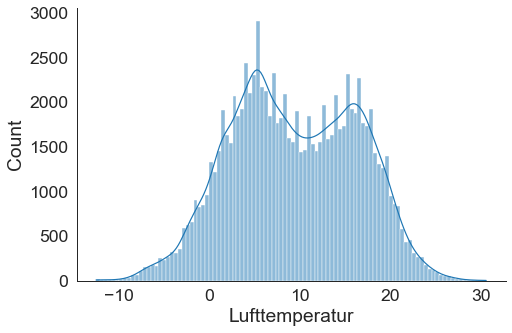

In [682]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=data_set, x="Lufttemperatur", kind="hist", bins = 100, aspect = 1.5, kde= True);

In [673]:
scp.anderson(data_set["Lufttemperatur"], dist='norm')

AndersonResult(statistic=476.17818030728085, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Both the visual inspection and the statistical test shows that the data is not normal distributed. The histogram does not show a bell shape and the statistical test show that the a = 0.01 = 1.092 which is less than 434.2, the test shows a significant value at every significance level.

### Q8. Do you regard any of the air temperature measures in the dataset to be extreme values/outliers? If so, how many values? Motivate why you consider these values as anomalies.

Yes,there are outliers in the dataset. The number of outlier values are 156. The values are unreasonable, what defines them as unreasonable is that the value of the air temperature in one hour 25 and an hour later became 40 this proves that the value 40 is unreasonable and counts as outlier. Even when we plot out the box plot, we see that there is value that is outside the limit. These values can affect the output of the analysis and statistical tests, for this reason we decided to remove them.

### Q9. Calculate the mean temperature for each day in the year 2021 and then plot those means using a line plot with dates on the x-axis. Use figsize= (15,8) to specify the size of the plot.

In [674]:
grup=round(data_set.groupby(data_set["Datum"])['Lufttemperatur'].mean(),1)
grup=grup.reset_index()
filtered_df = grup.loc[(grup['Datum'] >= '2021-01-01')
                     & (grup['Datum'] < '2022-01-01')]
filtered_df

,Datum,Lufttemperatur
3959,2021-01-01,3.0
3960,2021-01-02,1.6
3961,2021-01-03,2.1
3962,2021-01-04,1.0
3963,2021-01-05,1.8
...,...,...
4319,2021-12-27,-2.4
4320,2021-12-28,0.2
4321,2021-12-29,1.2
4322,2021-12-30,3.7


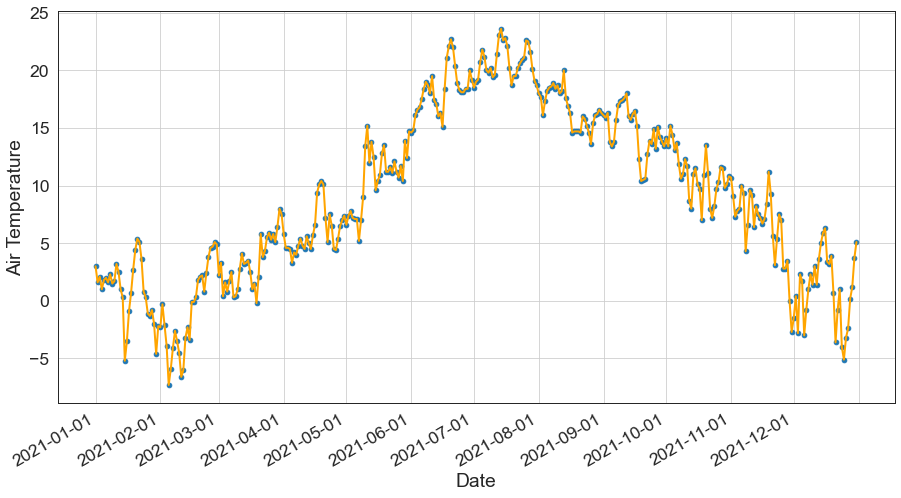

In [675]:
x= filtered_df.Datum
y= filtered_df.Lufttemperatur

# Plotting
fig = mpl.figure(figsize=(15,8))
ax=fig.add_subplot()
ax.plot(x,y,color="orange",linewidth=2)
half_year_locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(half_year_locator)
fig.autofmt_xdate()
ax.set_xlabel('Date')
ax.set_ylabel('Air Temperature')
ax.scatter(x,y)
ax.grid()

### Q10. Rank the overall temperature per two (2) consecutive months starting with the warmest 2-month period first, After that you should sort those means from highest to lowest and list the ten (10) warmest 2-month periods all together in the dataset.¶

In [676]:
dt=dt.reset_index()
#sum mean two month
dt1 = {'Datum': [],'Lufttemperatur': []}
dt1=pd.DataFrame(dt1)

for index in range(0,142):
    df1={"Datum":f"{dt.Datum[index]} + {dt.Datum[index+1]}","Lufttemperatur":round((dt.Lufttemperatur[index]+dt.Lufttemperatur[index+1])/2)}
    dt1=dt1.append(df1,ignore_index=True)
#sorting
df=dt1.sort_values(by=['Lufttemperatur'], ascending=False)
df

,Datum,Lufttemperatur
99,2018-06 + 2018-07,20.0
100,2018-07 + 2018-08,20.0
135,2021-06 + 2021-07,19.0
52,2014-07 + 2014-08,19.0
136,2021-07 + 2021-08,19.0
...,...,...
8,2010-11 + 2010-12,0.0
35,2013-02 + 2013-03,-1.0
33,2012-12 + 2013-01,-1.0
10,2011-01 + 2011-02,-1.0


In [677]:
df.head(10)

,Datum,Lufttemperatur
99,2018-06 + 2018-07,20.0
100,2018-07 + 2018-08,20.0
135,2021-06 + 2021-07,19.0
52,2014-07 + 2014-08,19.0
136,2021-07 + 2021-08,19.0
4,2010-07 + 2010-08,19.0
112,2019-07 + 2019-08,18.0
75,2016-06 + 2016-07,18.0
51,2014-06 + 2014-07,18.0
111,2019-06 + 2019-07,18.0


### Q11. Calculate the 95% confidence intervals (CI) for the mean for each daily average in Q9 and add it to the line plot that shows the mean values of each day of the year 2021. You can, for example, solve this by plotting the upper and lower bounds as lines above and below the mean line in your plot. Another more nicely looking solution is to visualize the CI as shades around the mean line in your plot.

In [679]:
filtered = data_set.loc[(data_set['Datum'] >= '2021-01-01')
                     & (data_set['Datum'] < '2022-01-01')]
filtered=filtered.reset_index(drop=True)
da=filtered.Datum.str[5:]
n=filtered.groupby(da)['Datum'].count()
st=filtered.groupby(da)['Lufttemperatur'].std()
filtered_df["n"]=[i for i in n]
filtered_df["STD"]=[i for i in st]
filtered_df=filtered_df.reset_index(drop=True)

C:\Users\karem\AppData\Local\Temp/ipykernel_23376/1470825723.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["n"]=[i for i in n]
C:\Users\karem\AppData\Local\Temp/ipykernel_23376/1470825723.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["STD"]=[i for i in st]


In [680]:
#define sample data
lower_lst = []
upper_lst = []
for i in range(365):
    lower,upper = scp.norm.interval(0.95, loc=filtered_df['Lufttemperatur'][i], scale=filtered_df['STD'][i]/np.sqrt(filtered_df['n'][i]))
    lower_lst.append(lower)
    upper_lst.append(upper)

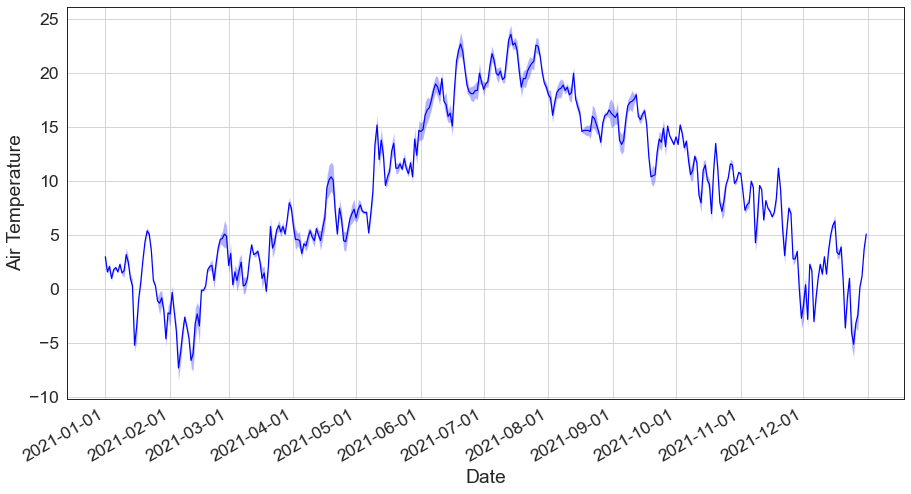

In [681]:
x= filtered_df.Datum
y= filtered_df.Lufttemperatur

# Plotting
fig = mpl.figure(figsize=(15,8))
ax=fig.add_subplot()
ax.plot(x,y,color="blue")
ax.fill_between(x, lower_lst, upper_lst, facecolor='blue', alpha= 0.3)
half_year_locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(half_year_locator)
fig.autofmt_xdate()
ax.set_xlabel('Date')
ax.set_ylabel('Air Temperature')
ax.grid()